In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import seaborn as

## End 2 end Scikit-Learn Workflow

In [2]:
# 1. Get the data
heart_disease = pd.read_csv(
    "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv"
)
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create Feature matrix (X)
X = heart_disease.drop("target", axis=1)

# create y target
y = heart_disease["target"]

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [6]:
len(heart_disease)

303

In [7]:
classifier = RandomForestClassifier()

In [8]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
model_prediction = classifier.predict(X_test)

In [11]:
model_prediction

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [12]:
classifier.score(X_train, y_train)

1.0

In [13]:
classifier.score(X_test, y_test)

0.8852459016393442

### Experiment to improve (hyperparameter tuning)

In [14]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    classifier = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {classifier.score(X_test, y_test)}")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.8360655737704918

Trying model with 20 estimators...
Model accruacy on test set: 0.819672131147541

Trying model with 30 estimators...
Model accruacy on test set: 0.8032786885245902

Trying model with 40 estimators...
Model accruacy on test set: 0.8852459016393442

Trying model with 50 estimators...
Model accruacy on test set: 0.8688524590163934

Trying model with 60 estimators...
Model accruacy on test set: 0.8852459016393442

Trying model with 70 estimators...
Model accruacy on test set: 0.8524590163934426

Trying model with 80 estimators...
Model accruacy on test set: 0.8524590163934426

Trying model with 90 estimators...
Model accruacy on test set: 0.8852459016393442



In [15]:
# using cross-validation

from sklearn.model_selection import cross_val_score

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    classifier = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {classifier.score(X_test, y_test)}")
    print(
        f"Cross-validation score: {np.mean(cross_val_score(classifier, X, y, cv=5)) * 100}%"
    )
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accruacy on test set: 0.8524590163934426
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accruacy on test set: 0.819672131147541
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accruacy on test set: 0.8524590163934426
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accruacy on test set: 0.8852459016393442
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accruacy on test set: 0.819672131147541
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accruacy on test set: 0.8688524590163934
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 82.814207650273

## Saving model for later use

In [16]:
import pickle

# Save trained model to file
pickle.dump(classifier, open("random_forest_model_1.pkl", "wb"))

In [17]:
# Load a saved model and make a prediction on a single example
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

In [18]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv"
)
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [19]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2)

In [20]:
test_data.head()

,Make,Colour,Odometer (KM),Doors,Price
90,Nissan,White,197844.0,4.0,5776.0
376,Nissan,White,64362.0,4.0,28993.0
788,Toyota,White,32748.0,4.0,30323.0
165,Nissan,Blue,211249.0,4.0,15767.0
336,Toyota,Green,165225.0,4.0,10841.0


## Data cleaning
### check for missing value

In [21]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [22]:
train_data["Make"].fillna("missing", inplace=True)
train_data["Colour"].fillna("missing", inplace=True)
train_data["Odometer (KM)"].fillna(df["Odometer (KM)"].median(), inplace=True)
train_data["Colour"].fillna("missing", inplace=True)

C:\Users\monda\AppData\Local\Temp\ipykernel_7188\3458752626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Make"].fillna("missing", inplace=True)
C:\Users\monda\AppData\Local\Temp\ipykernel_7188\3458752626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [23]:
train_data_label = train_data["Price"]
train_data_feature = train_data.drop("Price", axis=1)

In [24]:
train_data.dropna(inplace=True)

In [25]:
train_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [27]:
cat_data = ["Make", "Colour", "Doors"]

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


test_transformer = ColumnTransformer([("cat", OneHotEncoder(), cat_data)])
transformed_data = test_transformer.fit_transform(train_data_feature).toarray()

In [29]:
pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
797,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
train_data_label.isna().sum()

39

In [31]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor()
# model.fit(transformed_data, train_data_label)

In [32]:
test_data_ft = test_data.drop("Price", axis=1)
test_data_label = test_data["Price"]

In [33]:
car_sales_missing_data = pd.read_csv(
    "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv"
)
car_sales_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
car_sales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Handling Missing value with Scikit-learn

In [35]:
# drop row with missing price value
car_sales_missing_data.dropna(subset=["Price"], inplace=True)

In [36]:
car_sales_missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [37]:
car_sales_missing_data["Doors"].mean()

4.007751937984496

In [38]:
car_sales_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

car_sales_missing_data.dropna(subset=["Price"], inplace=True)
train_set, test_set = train_test_split(car_sales_missing_data, random_state=42)

In [40]:
car_sales_missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [41]:
test_set

,Make,Colour,Odometer (KM),Doors,Price
203,Toyota,Blue,99761.0,4.0,10547.0
979,Toyota,Black,17975.0,4.0,17940.0
729,Honda,Blue,197664.0,4.0,12950.0
838,Nissan,Green,235589.0,4.0,5905.0
919,Honda,Black,231659.0,4.0,9826.0
...,...,...,...,...,...
334,Honda,Blue,247869.0,4.0,11982.0
567,Toyota,White,122266.0,4.0,17664.0
29,Toyota,White,112004.0,4.0,13586.0
55,BMW,White,79937.0,5.0,48686.0


In [42]:
X = train_set.drop("Price", axis=1)
y = train_set["Price"].copy()
X_test = test_set.drop("Price", axis=1)
y_test = test_set["Price"].copy()

In [43]:
y_test

203    10547.0
979    17940.0
729    12950.0
838     5905.0
919     9826.0
        ...   
334    11982.0
567    17664.0
29     13586.0
55     48686.0
663    10241.0
Name: Price, Length: 238, dtype: float64

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="median")
num_imputer = SimpleImputer(strategy="median")


transf = ColumnTransformer(
    [
        ("cat_imputer", cat_imputer, ["Make", "Colour"]),
        ("odometer_imputer", num_imputer, ["Odometer (KM)"]),
        ("door_imputer", door_imputer, ["Doors"]),
    ]
)


train_filled_X = transf.fit_transform(X)
test_filled_x = transf.transform(X_test)

In [45]:
test_filled_x[:10]

array([['Toyota', 'Blue', 99761.0, 4.0],
       ['Toyota', 'Black', 17975.0, 4.0],
       ['Honda', 'Blue', 197664.0, 4.0],
       ['Nissan', 'Green', 235589.0, 4.0],
       ['Honda', 'Black', 231659.0, 4.0],
       ['Toyota', 'Blue', 247601.0, 4.0],
       ['Toyota', 'Green', 110078.0, 4.0],
       ['missing', 'White', 155383.0, 4.0],
       ['Nissan', 'White', 26634.0, 4.0],
       ['Honda', 'White', 132055.0, 4.0]], dtype=object)

In [46]:
X_test

,Make,Colour,Odometer (KM),Doors
203,Toyota,Blue,99761.0,4.0
979,Toyota,Black,17975.0,4.0
729,Honda,Blue,197664.0,4.0
838,Nissan,Green,235589.0,4.0
919,Honda,Black,231659.0,4.0
...,...,...,...,...
334,Honda,Blue,247869.0,4.0
567,Toyota,White,122266.0,4.0
29,Toyota,White,112004.0,4.0
55,BMW,White,79937.0,5.0


In [47]:
car_sales_filled_train = pd.DataFrame(train_filled_X, columns=X.columns)

car_sales_filled_test = pd.DataFrame(test_filled_x, columns=X_test.columns)

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [48]:
# convert the catogical data to numrical features

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# split data into X,Y

cat_transf = ColumnTransformer(
    [("cat", OneHotEncoder(), ["Make", "Colour", "Doors"])], remainder="passthrough"
)

In [49]:
transformed_X_train = cat_transf.fit_transform(car_sales_filled_train)
transformed_X_test = cat_transf.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.65225e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.43204e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.78899e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [50]:
y_train

130    1
44     1
221    0
85     1
54     1
      ..
176    0
191    0
99     1
220    0
260    0
Name: target, Length: 242, dtype: int64

In [51]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor()
model2 = DecisionTreeRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
classifier.fit(transformed_X_train, y)

classifier.score(transformed_X_test, y_test)

0.21393465108824272

In [52]:
model2.fit(transformed_X_train, y)

DecisionTreeRegressor()

In [53]:
model2.score(transformed_X_test, y_test)

-0.2133613265026375

### choosing the right Estimator/ ML Algorithm 

In [54]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

housing = fetch_california_housing()

In [55]:
type(housing)

sklearn.utils._bunch.Bunch

In [56]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [57]:
x = housing.data

In [58]:
X = pd.DataFrame(x)
X.columns = housing.feature_names
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [59]:
y_without_label = housing.target
# y_without_label.shape
y = pd.DataFrame(y_without_label)
y.columns = housing.target_names
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [60]:
housing_df = fetch_california_housing(as_frame=True)
housing_df

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [61]:
housing_X = pd.DataFrame(housing_df["data"])
housing_X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
housing_y = pd.DataFrame(housing_df["target"])
housing_y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [63]:
housing = housing_X.copy()

In [64]:
housing["target"] = housing_y

In [65]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [67]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(housing, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import SGDRegressor, Ridge

train_features = train_data.drop("target", axis=1)
train_label = train_data["target"]


test_X = test_data.drop("target", axis=1)
test_y = test_data["target"]

sgd_model = SGDRegressor(random_state=42)
sgd_model.fit(train_features, train_label)

SGDRegressor(random_state=42)

In [69]:
sgd_model.score(test_X, test_y)

-6.40655841595438e+28

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [71]:
mse_cross_score = cross_val_score(sgd_model, housing_X, housing_y.squeeze(), cv=10)
rmse_cross_score = np.sqrt(-mse_cross_score)

In [72]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [73]:
display_scores(rmse_cross_score)

Scores: [8.56778445e+14 3.71794748e+14 2.34224396e+15 1.19032364e+15
 9.08107254e+14 1.91526968e+14 1.48830369e+15 2.96811661e+15
 5.82789673e+14 4.51628479e+14]
Mean: 1135161346151144.5
Standard deviation: 855516362954660.9


In [74]:
ridge_model = Ridge()
ridge_model.fit(train_features, train_label)

Ridge()

In [75]:
ridge_model.score(test_X, test_y)

0.5758549611440125

In [76]:
# using ensemble model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(train_features, train_label)

RandomForestRegressor()

In [77]:
rf_score = cross_val_score(rf_model, train_features, train_label, cv=10)
display_scores(np.sqrt(-rf_score))

Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard deviation: nan


C:\Users\monda\AppData\Local\Temp\ipykernel_7188\485637821.py:2: RuntimeWarning: invalid value encountered in sqrt
  display_scores(np.sqrt(-rf_score))


In [78]:
rf_model.score(test_X, test_y)

0.8047552475125127

### Classification Problem

In [79]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
# Using linear SVC
ht_train_data, ht_test_data = train_test_split(
    heart_disease, random_state=42, test_size=0.2
)

In [81]:
ht_train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.462810,0.657025,0.991736,130.359504,246.842975,0.128099,0.553719,150.115702,0.314050,1.013223,1.421488,0.681818,2.301653,0.549587
std,9.204492,0.475687,1.022533,16.828858,52.795465,0.334893,0.530410,22.352398,0.465098,1.102577,0.607724,0.990620,0.593811,0.498566
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [82]:
corrleation = heart_disease.corr()
corrleation["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [83]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ht_X = ht_train_data.drop("target", axis=1)
ht_y = ht_train_data["target"]


pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("lin_svc", LinearSVC(random_state=42, max_iter=5000)),
    ]
)

pipe.fit(ht_X, ht_y)

# lin_svc_model = LinearSVC(random_state=42,)
# lin_svc_model.fit(ht_X, ht_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lin_svc', LinearSVC(max_iter=5000, random_state=42))])

In [84]:
ht_test_X = ht_test_data.drop("target", axis=1)
ht_test_y = ht_test_data["target"]
pipe.score(ht_test_X, ht_test_y)

0.8688524590163934

In [85]:
pipe_parameters = pipe.get_params()
pipe_parameters

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('lin_svc', LinearSVC(max_iter=5000, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'lin_svc': LinearSVC(max_iter=5000, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'lin_svc__C': 1.0,
 'lin_svc__class_weight': None,
 'lin_svc__dual': 'auto',
 'lin_svc__fit_intercept': True,
 'lin_svc__intercept_scaling': 1,
 'lin_svc__loss': 'squared_hinge',
 'lin_svc__max_iter': 5000,
 'lin_svc__multi_class': 'ovr',
 'lin_svc__penalty': 'l2',
 'lin_svc__random_state': 42,
 'lin_svc__tol': 0.0001,
 'lin_svc__verbose': 0}

In [86]:
lin_svc_model = pipe_parameters["lin_svc"]

In [87]:
# using cross-validation for classifier
svc_score = cross_val_score(pipe, ht_X, ht_y, cv=10)
display_scores(svc_score)

Scores: [0.72       0.76       0.875      0.875      0.75       0.75
 0.79166667 0.875      0.70833333 0.875     ]
Mean: 0.7979999999999999
Standard deviation: 0.06628138669507617


In [88]:
# using Random classifier
from sklearn.ensemble import RandomForestClassifier


rand_class_model = RandomForestClassifier()
rand_class_model.fit(ht_X, ht_y)
rand_class_model.score(ht_test_X, ht_test_y)

0.8360655737704918

* Categorical - mode and countplot
* Numeric - mean, median and histogram
* Numeric Numeric - correlation, scatter
* Categorical Categorical - pivot
* Categorical Numeric - violin plot 

## Fitting the Model/Algorithm

* use model.fit() for fitting data
* use model.predict() for predicting

* use sccuracy score for metric for metriculation, it same as model.score

## Evaluating Model

Three ways to evaluate scikit models
1. Estimator `score` method
2. Scoring parameter
3. Metric functions

In [89]:
rand_class_model.score(ht_X, ht_y)

1.0

In [90]:
rand_class_model.score(ht_test_X, ht_test_y)

0.8360655737704918

In [91]:
cross_val_score(rand_class_model, ht_X, ht_y)

array([0.7755102 , 0.81632653, 0.79166667, 0.8125    , 0.83333333])

## Classification model evaluation metrics


1. accuracy
2. area under curve
3. Confusion Matrix
4. Classification report

**Area Under Curve**

*Area Under Curve*
* ROC curve

ROC curves are a comparison of a models's true postive rate (tpr) versus a models false positive rate(fpr)

- True postive = model predicts 1 when truth is 1
- False positive = models predicts 1 when truth is 0

In [92]:
y_probs = rand_class_model.predict_proba(ht_test_X)
ht_y_predicted = rand_class_model.predict(ht_test_X)

In [93]:
y_probs[:10]

array([[0.91, 0.09],
       [0.39, 0.61],
       [0.48, 0.52],
       [0.92, 0.08],
       [0.22, 0.78],
       [0.17, 0.83],
       [0.3 , 0.7 ],
       [0.93, 0.07],
       [0.93, 0.07],
       [0.36, 0.64]])

In [94]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.09, 0.61, 0.52, 0.08, 0.78, 0.83, 0.7 , 0.07, 0.07, 0.64])

In [95]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(ht_test_y, y_probs_positive)

In [96]:
confusion_matrix(ht_test_y, ht_y_predicted)

array([[24,  5],
       [ 5, 27]], dtype=int64)

### ROC-Curve plotting function

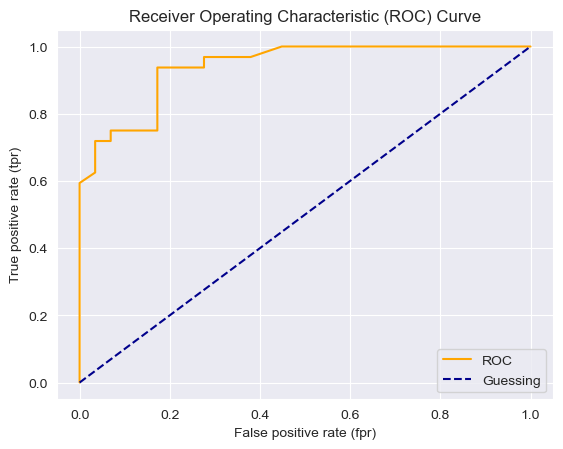

In [97]:
import matplotlib.pyplot as plt


def plot_roc_curve(fpr, tpr):
    """
    Plot ROC curve given the fpr and tpr
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # plot line with no predictive power
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()


plot_roc_curve(fpr, tpr)

In [98]:
# calculate auc score

roc_auc_score(ht_test_y, y_probs_positive)

0.9401939655172414

In [99]:
from sklearn.metrics import auc


def plot_roc_curve_b(y_true, y_scores, model_name="Model"):
    """
    Plots a ROC curve for a binary classifier.

    Parameters:
    y_true: array-like of shape (n_samples,)
        True binary labels (0, 1).

    y_scores: array-like of shape (n_samples,)
        Target scores, probabilities for the positive class.

    model_name: str, optional (default='Model')
        The name of the model to be displayed on the plot.
    """

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Plot the ROC curve
    plt.plot(
        fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})"
    )

    # Plot the random guess line (AUC = 0.5)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")

    # Beautify the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate (1 - Specificity)", fontsize=12)
    plt.ylabel("True Positive Rate (Sensitivity)", fontsize=12)
    plt.title(
        f"Receiver Operating Characteristic - {model_name}", fontsize=14, weight="bold"
    )
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)

    # Adding some background styling
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().set_facecolor("whitesmoke")

    plt.show()

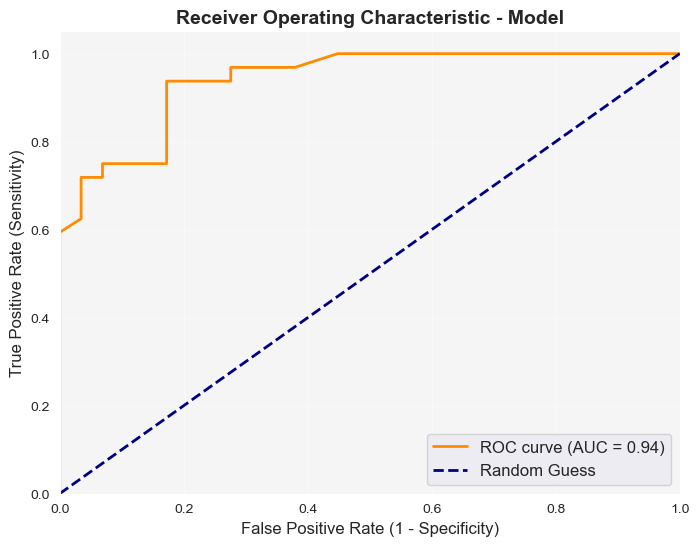

In [100]:
plot_roc_curve_b(ht_test_y, y_probs_positive)

### Confusion Matrix
This is a quick way to comapre the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [101]:
confusion_matrix(ht_test_y, ht_y_predicted)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [102]:
# visualize it


pd.crosstab(
    ht_test_y, ht_y_predicted, rownames=["Actual labels"], colnames=["Predicted labels"]
)

Predicted labels,0,1
Actual labels,,
0,24,5
1,5,27


In [103]:
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, labels=None, model_name="Model"):
    """
    Plots a confusion matrix using seaborn heatmap.

    Parameters:
    y_true: array-like of shape (n_samples,)
        True binary labels (0, 1).

    y_pred: array-like of shape (n_samples,)
        Predicted labels from the classifier.

    labels: list of labels for the confusion matrix axes (default=None)
        List of labels for the x and y axis.

    model_name: str, optional (default='Model')
        The name of the model to be displayed on the plot.
    """

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Plot using seaborn heatmap
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=labels,
        yticklabels=labels,
        annot_kws={"size": 14},
    )

    # Add titles and labels
    plt.title(f"Confusion Matrix - {model_name}", fontsize=16, weight="bold")
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)

    # Show the plot
    plt.show()

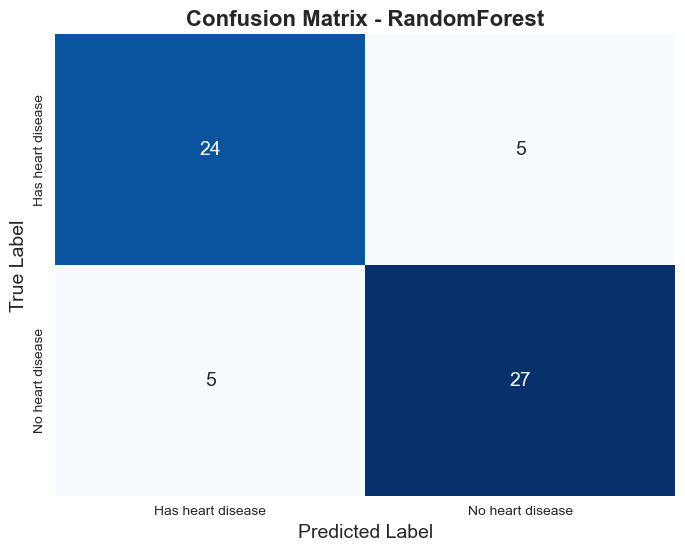

In [104]:
plot_confusion_matrix(
    ht_test_y,
    ht_y_predicted,
    labels=["Has heart disease", "No heart disease"],
    model_name="RandomForest",
)

### Classication Report

In [105]:
from sklearn.metrics import classification_report


pd.DataFrame(classification_report(ht_test_y, ht_y_predicted, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.827586,0.84375,0.836066,0.835668,0.836066
recall,0.827586,0.84375,0.836066,0.835668,0.836066
f1-score,0.827586,0.84375,0.836066,0.835668,0.836066
support,29.000000,32.00000,0.836066,61.000000,61.000000


* precision is the ability of the classifier not to label as positive a sample that is negative,
* recall is the ability of the classifier to find all the positive samples.

## Evalauting a Regression Model

1. R^2
2. MAE
3. MSE

In [106]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

rf_housing_model = RandomForestRegressor()
rf_housing_model.fit(train_features, train_label)


r_sq = rf_housing_model.score(test_X, test_y)
print(r_sq)

0.8051230593157366


In [107]:
# using MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error

housing_preds_rf = rf_housing_model.predict(test_X)
mse = mean_squared_error(test_y, housing_preds_rf)
print(f"mse: {mse}")
difference = np.subtract(housing_preds_rf, test_y)
mse_calc = np.sum(np.square(difference)) / len(test_X)
print(f"mse calculated: {mse_calc}")
mae = mean_absolute_error(test_y, housing_preds_rf)
print(f"mae: {mae}")

mse: 0.2553684927247781
mse calculated: 0.2553684927247781
mae: 0.32754256845930246


### Using `scoring` parameter 

In [108]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

### Evaluate the model using scikit learning functions

In [109]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)


# make some predicitions
y_preds = classifier.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds) * 100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds) * 100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


### Improving a model

- First prediction: Baseline predictions
- First model: baseline model

In [110]:
### Improving a model
classifier = RandomForestClassifier()
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [111]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Tuning hyperparameters by hand

- Train Set-> Model Trains
- Validation Set -> Hyperparameter tuning
- Test set -> Model Evaluation

In [112]:
from sklearn.metrics import root_mean_squared_error


def evaluate_classification_predictions(classifier, X_test, y_test):
    """
    Evaluates a classifier's predictions on test data.
    """
    # Make predictions
    y_preds = classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)

    # Create a dictionary of results
    results = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

    return results


def evaluate_regression_predictions(regressor, X_test, y_test):
    """
    Evaluates a regressor's predictions on test data.
    """
    # Make predictions
    y_preds = regressor.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    rmse = root_mean_squared_error(y_test, y_preds)

    # Create a dictionary of results
    results = {
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
    }

    return results

In [113]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)


# Split the data into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of data
valid_split = round((0.15 + train_split) * len(heart_disease_shuffled))  # 15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [114]:
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_classification_predictions(clf, X_valid, y_valid)
baseline_metrics

{'accuracy': 0.8241758241758241, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [115]:
np.random.seed(42)
clf_tuned = RandomForestClassifier(n_estimators=1000, max_depth=10)
clf_tuned.fit(X_train, y_train)
# Evaluate the classifier on the validation set
tuned_metrics = evaluate_classification_predictions(clf_tuned, X_valid, y_valid)
tuned_metrics

{'accuracy': 0.8131868131868132,
 'precision': 0.8235294117647058,
 'recall': 0.84,
 'f1': 0.8316831683168316}

### Hyperparameter tuning with RandomisedSearchCV

In [116]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4],
}

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)
rf_clf = RandomForestClassifier()
rs_clf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=grid,
    n_iter=10,  # try 10 models total
    cv=5,  # 5-fold cross-validation
    verbose=2,
)
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parame

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [117]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [118]:
evaluate_classification_predictions(rs_clf, X_test, y_test)

{'accuracy': 0.7868852459016393,
 'precision': 0.6944444444444444,
 'recall': 0.9259259259259259,
 'f1': 0.7936507936507936}

### Hyperparameter tuning with GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV
grid_2= {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2],
}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_clf_grid = RandomForestClassifier()
gs_clf = GridSearchCV(
    estimator=rf_clf_grid,
    param_grid=grid,
    cv=5,
)

gs_clf.fit(X_train, y_train)


C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 100, 200, 500, 1000, 1200]})

In [120]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [131]:
gs_clf.score(X_test, y_test)

0.819672131147541

In [121]:
evaluate_classification_predictions(gs_clf, X_test, y_test)

{'accuracy': 0.819672131147541,
 'precision': 0.7297297297297297,
 'recall': 0.9642857142857143,
 'f1': 0.8307692307692308}

### Evaluating tuned model 

In [122]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

y_probs = gs_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])


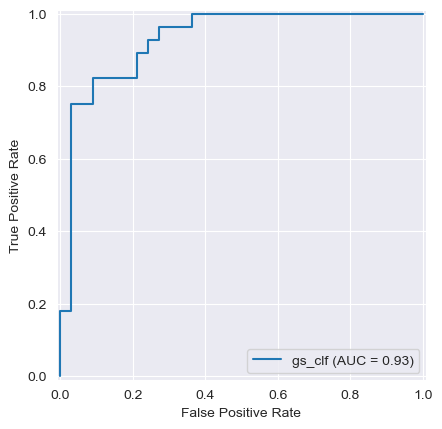

In [123]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="gs_clf")
display.plot()

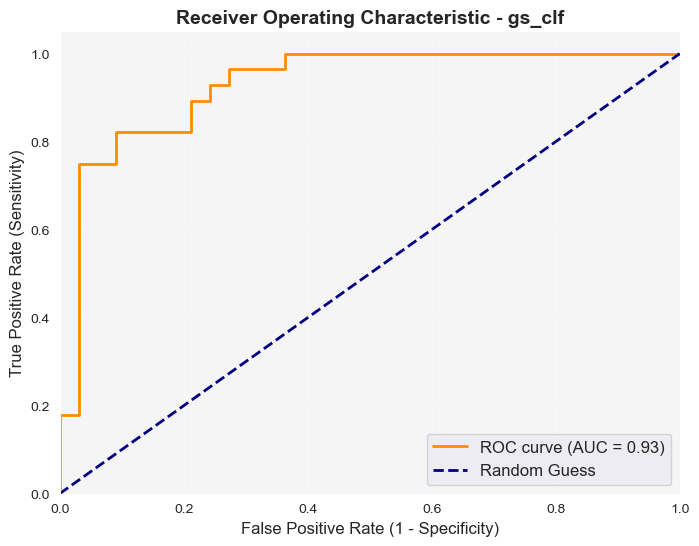

In [124]:
plot_roc_curve_b(y_test, y_probs[:, 1], model_name="gs_clf")

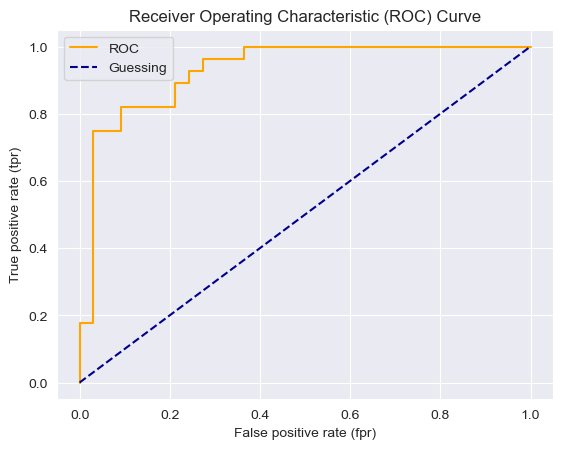

In [125]:
plot_roc_curve(fpr, tpr)

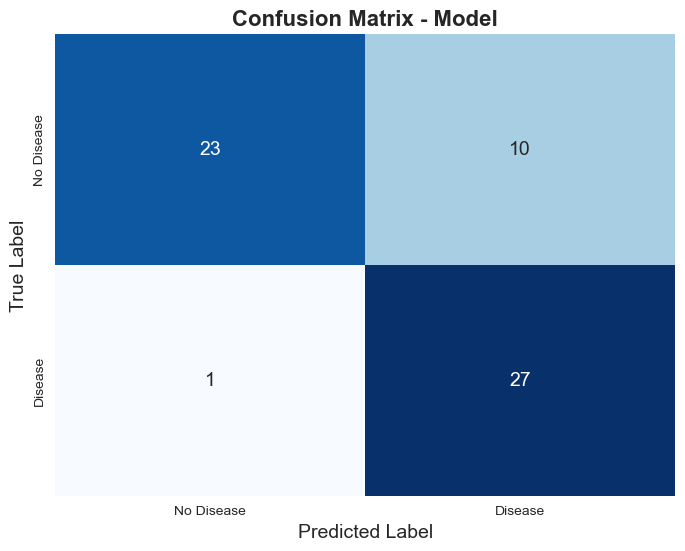

In [126]:
confusion_matrix(y_test, gs_clf.predict(X_test))
plot_confusion_matrix(y_test, gs_clf.predict(X_test), labels=["No Disease", "Disease"])

In [127]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

precision = precision_score(y_test, gs_clf.predict(X_test))
recall = recall_score(y_test, gs_clf.predict(X_test))
# precision_recall_curve
precision, recall

(0.7297297297297297, 0.9642857142857143)

In [128]:
pre, rec, thresholds = precision_recall_curve(y_test, y_probs[:, 1])

In [129]:
def plot_precsion_recall_curve(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    # plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

    # extra code – this section just beautifies and saves Figure 3–5
    idx = (thresholds >= thresholds).argmax()  # first index ≥ threshold
    # plt.plot(thresholds[idx], precisions[idx], "bo")
    # plt.plot(thresholds[idx], recalls[idx], "go")
    # plt.axis([-50000, 50000, 0, 1])
    plt.grid()
    plt.xlabel("Threshold")
    plt.legend(loc="center right")
    

    plt.show()

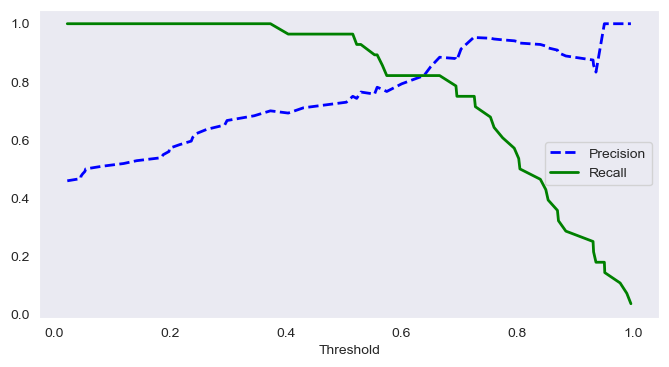

In [130]:
plot_precsion_recall_curve(pre, rec, thresholds)

In [134]:
# tuning Logistic Regression
log_reg_grid = {
    "C" : np.logspace(-4,4,30),
    "solver" : ["liblinear"]
}

In [135]:
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True).fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [136]:
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [137]:
gs_log_reg.score(X_test, y_test)

0.8360655737704918

In [138]:
# prediction of tuned model
tuned_y_preds = gs_log_reg.predict(X_test)
tuned_y_preds

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

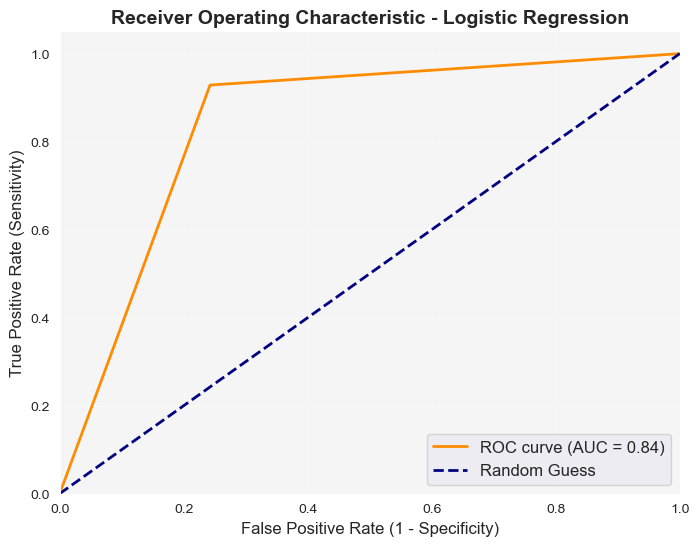

In [140]:
plot_roc_curve_b(y_test, tuned_y_preds, model_name="Logistic Regression")

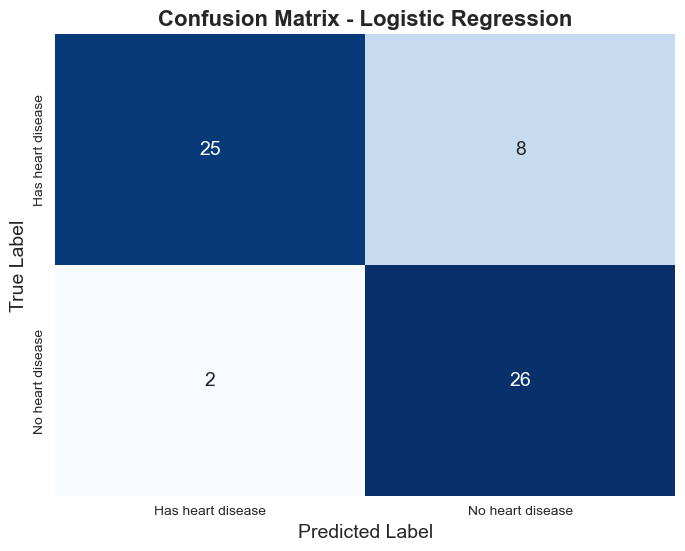

In [143]:
plot_confusion_matrix(y_test, tuned_y_preds, labels=["Has heart disease", "No heart disease"],model_name="Logistic Regression",)

In [146]:
len(y_test[y_test == 0])

33

In [147]:
print(classification_report(y_test, tuned_y_preds))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [148]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

precision = precision_score(y_test, tuned_y_preds)
recall = recall_score(y_test, tuned_y_preds)

In [149]:
print("The precision score: ", precision)
print("The recall score: ", recall)

The precision score:  0.7647058823529411
The recall score:  0.9642857142857143


In [152]:
# cross validate using cross_value_score
lg_clf = LogisticRegression(
    solver='liblinear',
    C = 9.236708571873866,
)

lg_clf_recall = cross_val_score(lg_clf, X, y, cv=5, scoring= "recall", verbose=2)
display_scores(lg_clf_recall)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Scores: [0.87878788 0.84848485 0.87878788 0.87878788 0.87878788]
Mean: 0.8727272727272727
Standard deviation: 0.01212121212121211


In [153]:
lg_clf_precision = cross_val_score(lg_clf, X, y, cv=5, scoring= "precision")
display_scores(lg_clf_precision)

Scores: [0.87878788 0.8        0.80555556 0.70731707 0.85294118]
Mean: 0.8089203367969506
Standard deviation: 0.05870847484017727


In [166]:
# visualize metrics

cv_metrics = pd.DataFrame(
    {
        "Recall": lg_clf_recall.mean(),
        "Precision": lg_clf_precision.mean(),
        
    },index=[0]
)
cv_metrics

,Recall,Precision
0,0.872727,0.80892


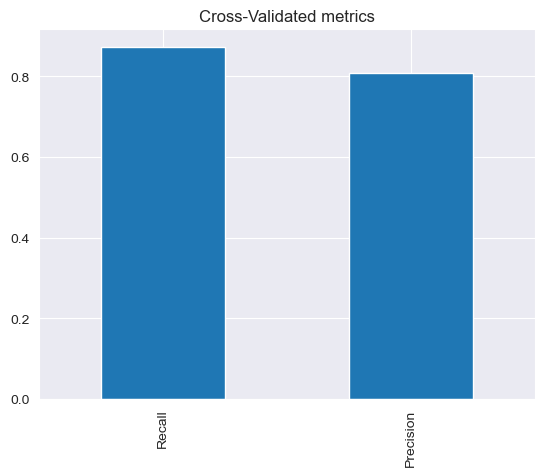

In [167]:
cv_metrics.T.plot.bar(title= "Cross-Validated metrics", legend=False);



### Finding Important features: Feature Selection

In [169]:
clf = LogisticRegression(C= 9.236708571873866, solver='liblinear')
clf.fit(X, y)


LogisticRegression(C=9.236708571873866, solver='liblinear')

In [170]:
clf.coef_

array([[ 0.00270913, -1.6613719 ,  0.8471923 , -0.01752799, -0.0041105 ,
         0.00927799,  0.48922953,  0.02679283, -0.92387164, -0.52258152,
         0.57882889, -0.76544229, -0.86997909]])

In [174]:
feature_dict = dict(zip(X.columns, clf.coef_[0]))
ft_df = pd.DataFrame(
    feature_dict,
    index=[0],
)

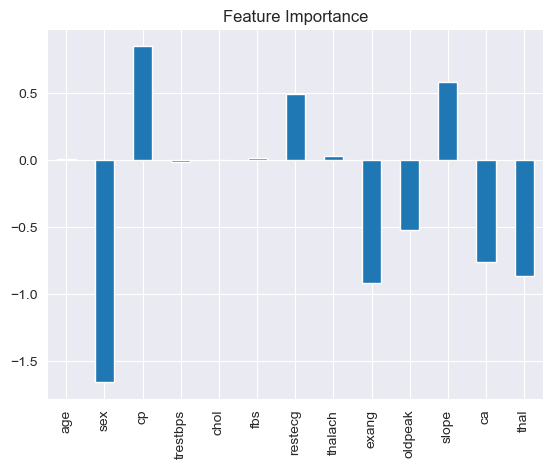

In [175]:
ft_df.T.plot.bar(title= "Feature Importance", legend=False);